In [24]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [5]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4246,spam,Text PASS to 69669 to collect your polyphonic ...,NaN,NaN,NaN
3179,ham,There the size of elephant tablets & u shove u...,NaN,NaN,NaN
3634,ham,It's not that you make me cry. It's just that ...,NaN,NaN,NaN
2730,ham,I havent lei.. Next mon can?,NaN,NaN,NaN
2649,ham,You might want to pull out more just in case a...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deploy

## 1) Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
# Drop Last Three Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Renaming The Columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Encoding Target Column
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# Check For Duplicate Values
df.duplicated().sum()

403

In [21]:
# Remove Duplicates
df=df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

## 2) EDA

In [25]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

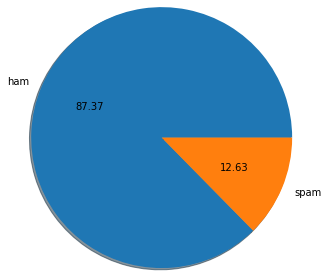

In [40]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f',shadow=True,radius=1.5)
plt.show()

- Data Is Imbalanced

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [45]:
# Number Of Characters
df['num_characters']=df['text'].apply(len)

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
# Number Of Words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [52]:
# Number Of Sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [60]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286903,1.961308
std,58.236293,13.227173,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [61]:
# For Ham Messages
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.958370,1.815545
std,56.358207,13.395014,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [62]:
# For Spam Messages
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


- Here We can see that spam messsages are quite long as there is a big difference in mean for both ham and spam messages

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

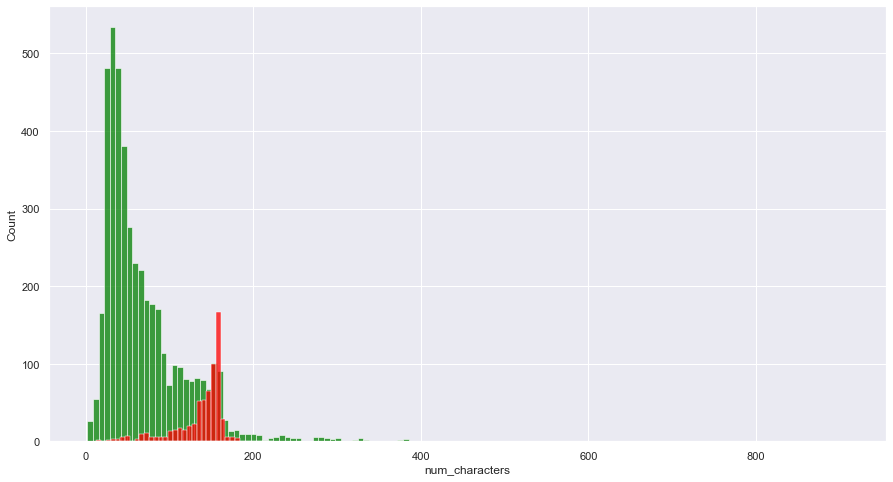

In [88]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

- Here in above graph the number of characters are more in spam messages as comapared to ham messages.
- Also some outliers are present in ham messages where few messages has length of characters between 200 and 400

<AxesSubplot:xlabel='num_words', ylabel='Count'>

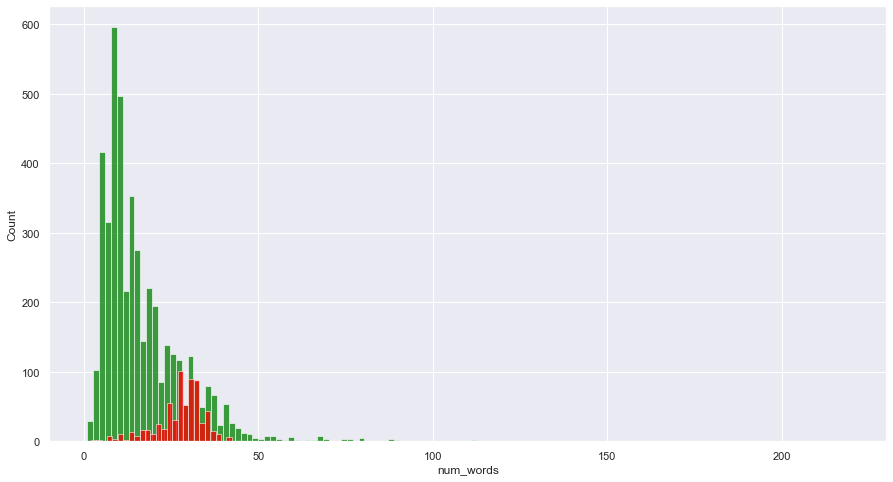

In [87]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

- Here in above graph the number of words are more in spam messages as comapared to ham messages.
- Also some outliers are present in ham messages where few messages has length of words between 50 and 90

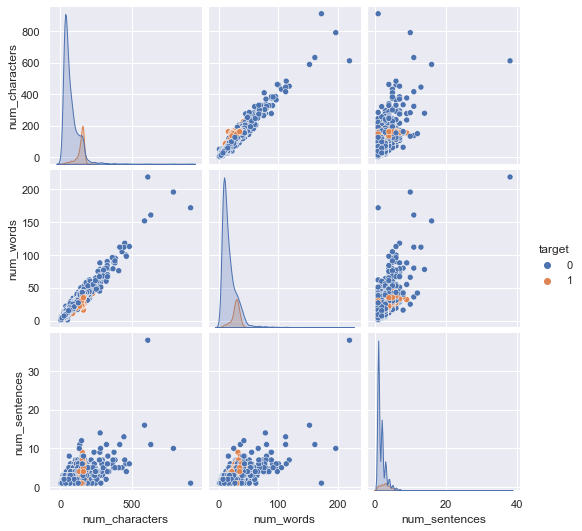

In [94]:
sns.pairplot(df,hue='target')

- Here there is a kind of linear relationship between no of characters, words and sentences.
- It's a obvious thing if number of characters are increasing then words will also increase.
- Outliers are also present.

<AxesSubplot:>

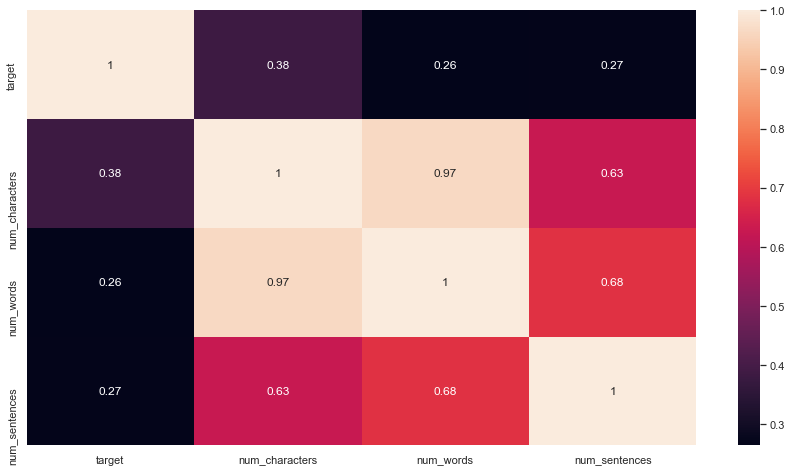

In [96]:
sns.heatmap(df.corr(),annot=True)

- As the number of charcters increases the message of being spam also increases.
- There is a high collinearity between number of characters and words followed by number of sentences.
- So we can keep only one column out of all columns and obviously we will keep number of characters coulumn because it shows more corelation with target column.

## 3) Text Preprocessing
- Lower Case
- Tokenization
- Removal of Special Characters
- Removal of Stop Words and Punctuations
- Stemming



In [119]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [120]:
transform_text('I Loved the Lectures on Machine Learning. How About You?')

'love lectur machin learn'

In [121]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [122]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [124]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [144]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=500,min_font_size=10,background_color='white')

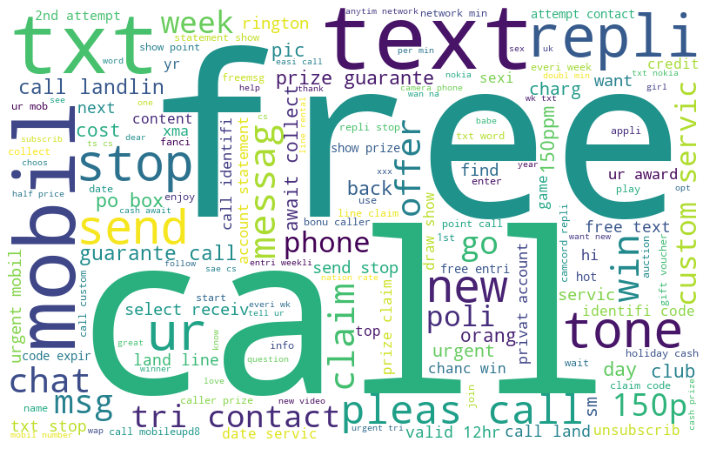

In [150]:
# Ham WordCloud
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

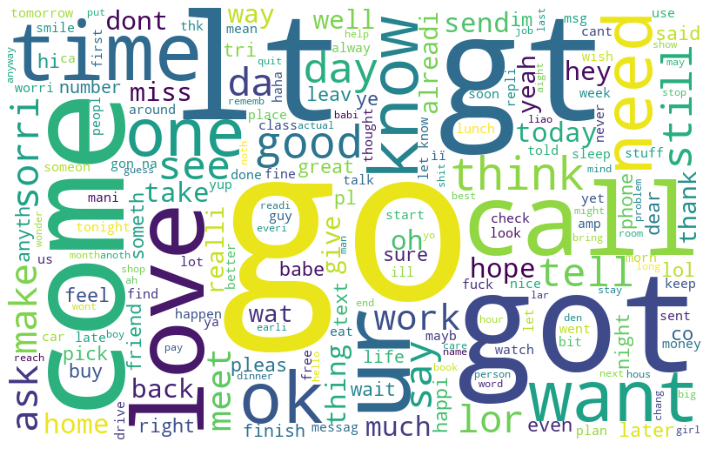

In [149]:
# Spam WordCloud
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()

In [152]:
# Most frequent words in Spam
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [153]:
len(spam_corpus)

9883

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


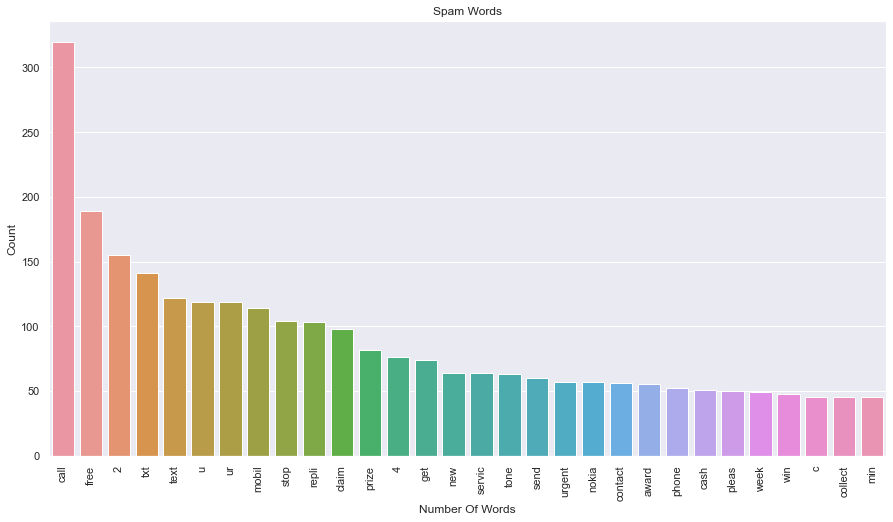

In [165]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(df1[0],df1[1])
plt.xticks(rotation='vertical')
plt.title("Spam Words")
plt.xlabel('Number Of Words')
plt.ylabel('Count')
plt.show()

C:\Users\ADMIN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


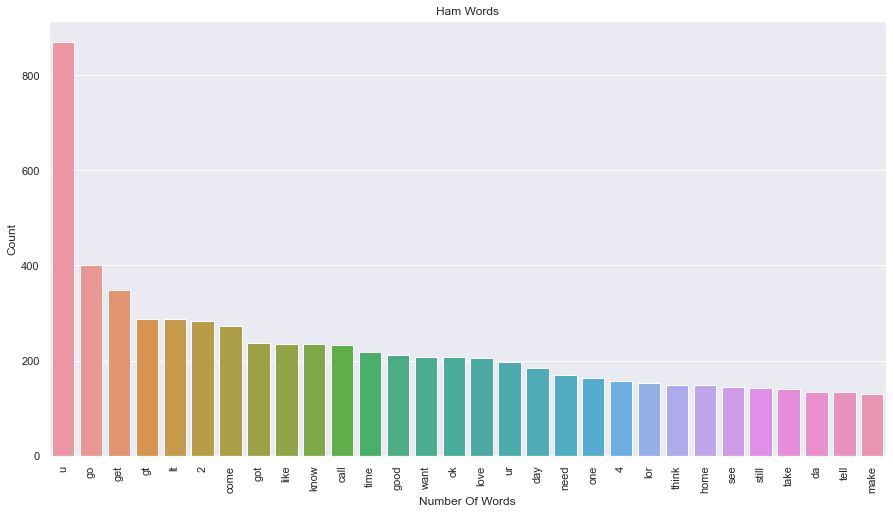

In [166]:
# Most frequent words in Ham
spam_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
df2=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(df2[0],df2[1])
plt.xticks(rotation='vertical')
plt.title("Ham Words")
plt.xlabel('Number Of Words')
plt.ylabel('Count')
plt.show()

## 4) Modeing Building

In [368]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [369]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [370]:
#Scaling Trying MinMaxScaler as it will provide all positive values 
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [371]:
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [372]:
X.shape

(5169, 3000)

In [373]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [376]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [377]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [378]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.867504835589942
[[769 116]
 [ 21 128]]
0.5245901639344263


In [379]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9671179883945842
[[885   0]
 [ 34 115]]
1.0


In [380]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
[[885   0]
 [ 25 124]]
1.0


- Using CountVectorizer:
- GaussianNB={ accuracy_score: 0.8713, precision_score: 0.5322 }
- MultinomialNB={ accuracy_score: 0.9700, precision_score: 0.9041 }
- BernoulliNB={ accuracy_score: 0.9671, precision_score: 0.9674 }

- Using TfidfVectorizer:
- GaussianNB={ accuracy_score: 0.8675, precision_score: 0.5245 }
- MultinomialNB={ accuracy_score: 0.9458, precision_score: 1.0 }
- BernoulliNB={ accuracy_score: 0.9671, precision_score: 0.9674 }

- Using TfidfVectorizer with max_features=3000:
- GaussianNB={ accuracy_score: 0.8675, precision_score: 0.5245 }
- MultinomialNB={ accuracy_score: 0.9671, precision_score: 1.0 }
- BernoulliNB={ accuracy_score: 0.9758, precision_score: 1.0 }

- Observation:
- GaussianNB is  not working well as data set is not normalize hence GaussianNB is performing bad here.
- BernoulliNB is giving constant results in both the techniques i.e. CountVectorizer and TfidfVectorizer.
- MultinomialNB is performing well in terms of TfidfVectorizer as our dataset is imbalance so our main concern is precision_score which is 100% in this case.Hence we can consider MultinomialNB with TfidfVectorizer.
- After changing max_features to 3000 both MultinomialNB and BernoulliNB is performing well. max_features value is taken after doing trial and error method

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [346]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [347]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [348]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [349]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8558994197292069, 0.0)

In [350]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8558994197292069
Precision -  0.0
For  KN
Accuracy -  0.9284332688588007
Precision -  0.8048780487804879
For  NB
Accuracy -  0.9264990328820116
Precision -  1.0
For  DT
Accuracy -  0.941972920696325
Precision -  0.9009009009009009
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9661016949152542
For  RF
Accuracy -  0.97678916827853
Precision -  0.9844961240310077
For  AdaBoost
Accuracy -  0.965183752417795
Precision -  0.9448818897637795
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.9253731343283582
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9696969696969697
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9380530973451328
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9548872180451128


In [288]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [289]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.888781,1.000000
2,NB,0.945841,1.000000
5,RF,0.974855,1.000000
8,ETC,0.971954,1.000000
9,GBDT,0.958414,0.973214
10,xgb,0.971954,0.968750
0,SVC,0.968085,0.967742
6,AdaBoost,0.969052,0.960630
4,LR,0.955513,0.955752
7,BgC,0.962282,0.898551


In [290]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [291]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.888781
1,NB,Accuracy,0.945841
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.971954
4,GBDT,Accuracy,0.958414
5,xgb,Accuracy,0.971954
6,SVC,Accuracy,0.968085
7,AdaBoost,Accuracy,0.969052
8,LR,Accuracy,0.955513
9,BgC,Accuracy,0.962282


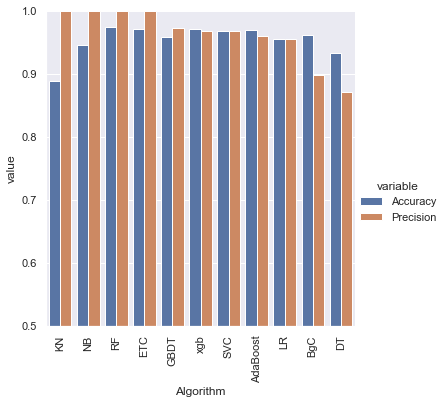

In [292]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

In [293]:
#1 Change the max_features parameter of TfIdf
#2 Tried Scaling 

In [312]:
# First Improvement
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.888781,1.000000,0.909091,1.000000
1,NB,0.945841,1.000000,0.967118,1.000000
2,RF,0.974855,1.000000,0.977756,1.000000
3,ETC,0.971954,1.000000,0.977756,0.984615
4,GBDT,0.958414,0.973214,0.959381,0.965217
5,xgb,0.971954,0.968750,0.973888,0.962121
6,SVC,0.968085,0.967742,0.971954,0.976190
7,AdaBoost,0.969052,0.960630,0.967118,0.960000
8,LR,0.955513,0.955752,0.961315,0.965812
9,BgC,0.962282,0.898551,0.958414,0.873239


In [331]:
# Second Improvement
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df_scaled = new_df.merge(temp_df1,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.888781,1.000000,0.909091,1.000000,0.906190,0.981481
1,NB,0.945841,1.000000,0.967118,1.000000,0.978723,0.984733
2,RF,0.974855,1.000000,0.977756,1.000000,0.977756,1.000000
3,ETC,0.971954,1.000000,0.977756,0.984615,0.977756,0.984615
4,GBDT,0.958414,0.973214,0.959381,0.965217,0.959381,0.965217
5,xgb,0.971954,0.968750,0.973888,0.962121,0.973888,0.962121
6,SVC,0.968085,0.967742,0.971954,0.976190,0.966151,0.952381
7,AdaBoost,0.969052,0.960630,0.967118,0.960000,0.967118,0.960000
8,LR,0.955513,0.955752,0.961315,0.965812,0.965184,0.966942
9,BgC,0.962282,0.898551,0.958414,0.873239,0.958414,0.873239


In [351]:
# Third Improvement
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df2,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.888781,1.000000,0.909091,1.000000,0.906190,0.981481
1,NB,0.945841,1.000000,0.967118,1.000000,0.978723,0.984733
2,RF,0.974855,1.000000,0.977756,1.000000,0.977756,1.000000
3,ETC,0.971954,1.000000,0.977756,0.984615,0.977756,0.984615
4,GBDT,0.958414,0.973214,0.959381,0.965217,0.959381,0.965217
5,xgb,0.971954,0.968750,0.973888,0.962121,0.973888,0.962121
6,SVC,0.968085,0.967742,0.971954,0.976190,0.966151,0.952381
7,AdaBoost,0.969052,0.960630,0.967118,0.960000,0.967118,0.960000
8,LR,0.955513,0.955752,0.961315,0.965812,0.965184,0.966942
9,BgC,0.962282,0.898551,0.958414,0.873239,0.958414,0.873239


In [365]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9924812030075187


In [366]:
# Applying stacking

from sklearn.ensemble import StackingClassifier
st_estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

clf = StackingClassifier(estimators=st_estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9924812030075187


In [381]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
#1) congratulation you have won 1000 call on this number to get your prize
#2) you could be entitled up to 3,160 in compensation from mis sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out
#3) I am free today lets go out foro a movie. What do you say?
#4) A [reducted] loan for 950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[reduted].co.uk to opt out reply STOP
#5) Did you see the match? It was insane.
#6) Accident compensation. You have still not claim the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP
#7) I Love you. . . Do you love me?